In [16]:
%matplotlib inline

import sys
sys.path.insert(0, "../fl_sim/")
import os
from PIL import Image
import numpy as np
import torch
from torchvision.utils import save_image

from utils.logger import Logger
import utils.gan_utils as gan_utils
from utils.tasks import get_task_elements
from fid_mnist import load_fedgan_all_styles

In [19]:
WHICH = "padpaf"
SAMPLES_DIR = "samples/imgs"
os.makedirs(SAMPLES_DIR, exist_ok=True)

MODEL_PATHS = {
    "padpaf": "/home/abdulla.almansoori/projects/PaDPaF/outputs/id=padpaf/task=damnist-fedgan/lr=0.001_0.01/seed=123/model/model.pth.tar",
    # :padpaf": "/home/abdulla.almansoori/projects/PaDPaF/outputs/id=damnist-padpaf/task=damnist-fedgan/lr=0.001_0.01/seed=123/model/model.pth.tar",
    "ditto": "/home/abdulla.almansoori/projects/PaDPaF/outputs/id=damnist-ditto/task=damnist-fedgan/lr=0.001_0.01/seed=123/model/model.pth.tar",
    "ditto_fedprox": "/home/abdulla.almansoori/projects/PaDPaF/outputs/id=damnist-ditto-fedprox/task=damnist-fedgan/lr=0.001_0.01/seed=123/model/model.pth.tar",
}

### Set up once

In [4]:
Logger.setup_logging("INFO", logfile="")
Logger()
os.makedirs(SAMPLES_DIR)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
init_model, _, _, _, train_dataset, _ = get_task_elements("damnist-fedgan", 128, "../data/")

### Sample

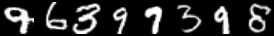

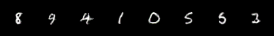

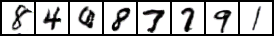

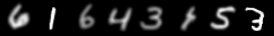

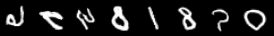

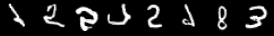

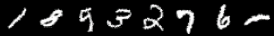

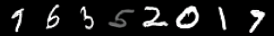

In [20]:
model = init_model().to(device)
model, private_modules = load_fedgan_all_styles(model, MODEL_PATHS[WHICH], device=device)

num_samples = 8
style_latent = torch.randn(num_samples, model.num_latents).to(device)

for m in private_modules:
    if "model" in m:
        model.load_state_dict(m["model"])
    else:
        model.style_map.load_state_dict(m["style_map"])
    content_latent = torch.randn(num_samples, model.num_latents).to(device)
    x = model.G(content_latent, cond=model.style_map(style_latent))
    display(Image.fromarray(gan_utils.tensor_to_np(gan_utils.make_grid(0.5+0.5*x))))
    save_image(x, f"{SAMPLES_DIR}/{WHICH}_{m['id']}.pdf", normalize=True, range=(-1,1))